# Preparation

1. Handle Missing Values
- Handle erroneous data and/or outliers you wish to address
- encode variables as needed
- new feature that represents tenure in years
- create single variable representing the information from phone_service and multiple_lines
- do the same using dependents and partner
- other ways to merge variables, such as streaming_tv & streaming_movies, online_security & - online_backup
- scale data as needed
- split data to train/validate/test

- Deliverable: Prepare.py


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from acquire import acquire_data

In [2]:
df = acquire_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


## 1. Check missing values

In [3]:
(df.isna()).sum()
#There is no missing values

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
dtype: int64

## 2. Drop unnecessary columns


In [4]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [5]:
df = df.drop(columns = ['customer_id', 'gender','total_charges'])
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn
0,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,No
1,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,No
2,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,Yes
3,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,Yes
4,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,Yes


## 3. Check if tenure is 0, if there are, drop them

In [6]:
(df.tenure == 0).sum()

11

In [7]:
df = df[df.tenure != 0]
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn
0,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,No
1,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,No
2,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,Yes
3,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,Yes
4,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,Yes


## 3. Handle erroneous data and/or outliers you wish to address

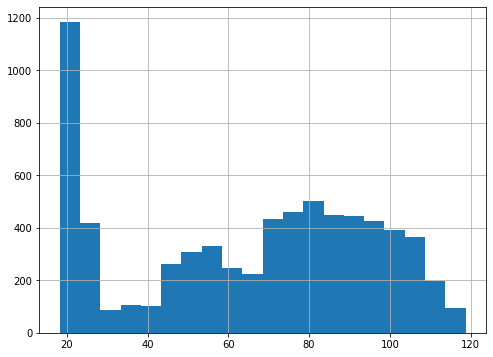

In [8]:
df.monthly_charges.hist(bins = 20, figsize = (8,6))

So There is no outliers

## 4. Encode

In [9]:
for c in df.drop(columns = ['monthly_charges', 'tenure']).columns:
    print(df[c].value_counts())

0    5890
1    1142
Name: senior_citizen, dtype: int64
No     3639
Yes    3393
Name: partner, dtype: int64
No     4933
Yes    2099
Name: dependents, dtype: int64
Yes    6352
No      680
Name: phone_service, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
2    3096
1    2416
3    1520
Name: internet_service_type_id, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: streaming_tv, dtype: int64
N

In [10]:
def encoder(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [11]:
for i in df.drop(columns = ['tenure', 
                               'monthly_charges', 
                               'internet_service_type_id',
                               'contract_type_id',
                               'payment_type_id'
                              ]).columns:
    df[i] = df[i].apply(encoder)

In [12]:
df.dtypes

senior_citizen                int64
partner                       int64
dependents                    int64
tenure                        int64
phone_service                 int64
multiple_lines                int64
internet_service_type_id      int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract_type_id              int64
paperless_billing             int64
payment_type_id               int64
monthly_charges             float64
churn                         int64
dtype: object

## 5. New feature that represents tenure in years

In [13]:
df['tenure_year'] = (df.tenure/12 ).apply(np.ceil).astype('int')
df['tenure_year'].head()

0    1
1    1
2    1
3    2
4    1
Name: tenure_year, dtype: int64

## 6. Create single variable representing the information from phone_service and multiple_lines

## 7. Split Data

In [14]:
train, test = train_test_split(df, train_size = 0.8, random_state=123)

In [15]:
train, validate = train_test_split(train, train_size = .8, random_state = 123)

In [16]:
train.shape,validate.shape,test.shape

((4500, 19), (1125, 19), (1407, 19))

## 8. Scale data as needed

**There is only one continuious variable, there is no need to scale data.**


In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(train[['tenure', 'monthly_charges']])

train[['tenure', 'monthly_charges']] = scaler.transform(train[['tenure', 'monthly_charges']])

train.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn,tenure_year
3221,0,1,0,0.267606,1,0,2,0,0,0,0,1,1,2,1,3,0.724551,0,2
3076,0,0,0,0.746479,1,0,2,1,0,1,0,1,0,1,0,2,0.712575,0,5
4825,0,0,0,0.154930,1,0,1,0,1,0,0,0,0,1,1,1,0.309381,0,1
5571,0,0,0,0.000000,0,0,1,0,1,0,1,0,1,1,1,2,0.261976,1,1
6967,0,1,1,0.478873,0,0,1,1,0,0,1,1,0,3,1,4,0.278942,0,3
